<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">One-class SVM for Novelty Detection<br> </div>

<div style="font-size:10pt; line-height:10pt; font-weight:bold; text-align:center;"> Student: Daniela Andrioaie(SDD 2020- 2021)<br> </div>

1. [Introduction](#sec1)
    1. [Novelty Detection](#sec1-1)
    2. [Outlier Detection VS Novelty Detection](#sec1-2)
    3. [Applications of Novelty Detection](#sec1-3)
    
2. [SVM](#sec2)
    1. [What we already know](#sec2-1)
    2. [Basic concepts](#sec2-2)
    3. [Kernel function](#sec2-3)
    4. [Visualization of 2-class SVM](#sec2-4)
3. [One-class SVM](#sec3)
    1. [Getting a first intuition of the new problem](#sec3-1)
        1. [One-Class SVM approach and types](#sec3-1-1)
    2. [Techniques used in one-class SVM](#sec3-2)
        1. [Novelty detection using density estimation ](#sec3-2-1)
        2. [Varnick's Principle ](#sec3-2-2)
        3. [Maximum Distance Hyperplane](#sec3-2-3)
        4. [Minimum enclosing ball](#sec3-2-4)
        5. [Adaptive thresholds](#sec3-2-5)
        6. [The $\nu$-property theorem](#sec3-2-6)
        7. [Example](#sec3-2-7)   
4. [One-class SVM approach by Schölkopf](#sec4)
    1. [Optimization problem](#sec4-1)
    2. [Experiment](#sec4-2)
    3. [Results](#sec4-3)
5. [One-class SVM approach by Tax and Duin](#sec5)
    1. [Flexible Data Description](#sec5-1)
    2. [Experiment](#sec5-2)
    3. [Results](#sec5-3)
6. [Comparison between Schölkopf approach and Tax and Duin approach](#sec6)
7. [Conclusion](#sec7)
8. [Bibliography](#sec8)

        
        
        
        
    

# <a id="sec1"></a> 1. Introduction

##  <a id="sec1-1"></a> 1.1. Novelty Detection:

&emsp;&emsp;It is the task of identifying abnormal data points that a machine learning system is not aware of during the training. Abnormal data points are data points that differ in some respect from the data points that are available during training. This may be seen as “one-class classification”.  


##  <a id="sec1-2"></a> 1.2. Outlier Detection VS Novelty Detection  

&emsp;&emsp;Outlier detection and novelty detection are both used for anomaly detection. **Outlier detection** is used to detect data points that are far from the rest of the data points in the dataset. It is also known as unsupervised anomaly detection. **Novelty detection** is used to detect unobserved pattern in a new dataset which is not included in the training dataset. Here, the training dataset is not polluted by the outliers. It is also known as semi-supervised anomaly detection.    

## <a id="sec1-3"></a> 1.3.  Applications of Novelty Detection

&emsp;&emsp;Novelty detection is practical in real life applications in different-different domains. And it is important in application domains that involve large datasets acquired from critical systems. This includes:
- **Network Intrusion Detection**: Detect whether someone is trying to hack the network, downloading tons of MP3s, or doing anything else unusual on the network.
- **Jet Engine Failure Detection**: You can’t destroy jet engines just to see how they fail.
- **Database Cleaning**: We want to find out whether someone stored bogus information in a database (typos, etc.), mislabelled digits, ugly digits, bad photographs in an electronic album.
- **Fraud Detection**: Credit Cards, Telephone Bills, Medical Records
- **Self calibrating alarm devices**: Car alarms (adjusts itself to where the car is parked), home alarm (furniture, temperature, windows, etc.)

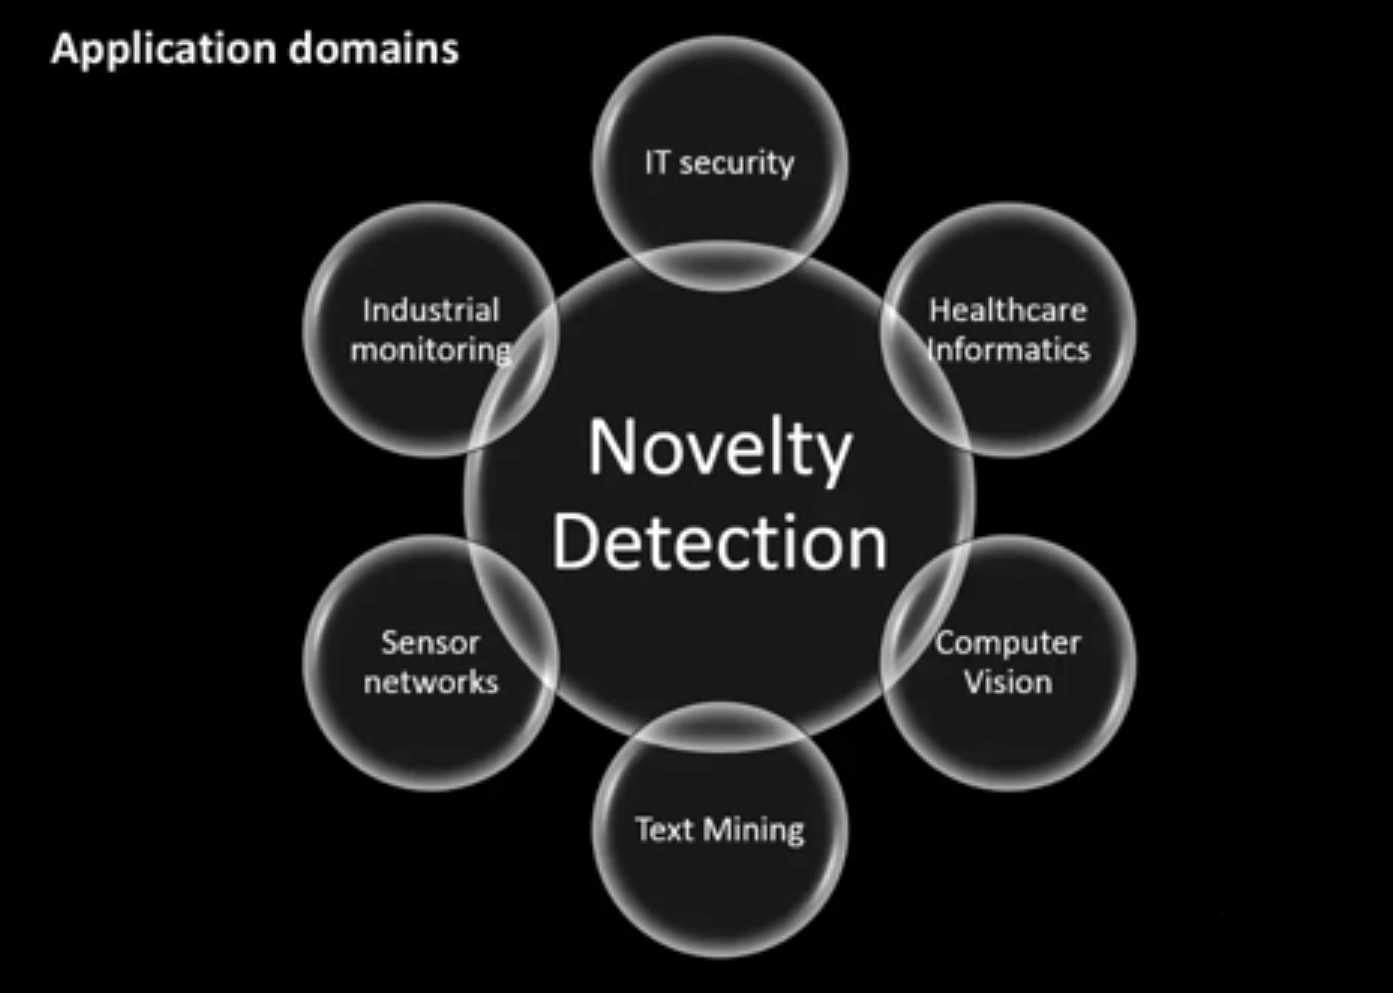

In [3]:
from IPython.display import Image
Image(filename='novelty_detec.png') 

# <a id="sec2"></a> 2. Support Vector Machines (SVM)

## <a id="sec2-1"></a> 2.1. What we already know

&emsp;&emsp;If not, here is a reminder. 
If really not remembering the details and if you want to revise all the maths please go to the course **Support Vector Machines, the Bias-Variance tradeoff and a short introduction to kernel theory**.

Below 2 concepts will help us further understand the notebook.
Let's recall the **key concepts** to have an initial feeling of the problem, before jumping into it.

Let us first take a look at the traditional two-class support vector machine. Consider a data set $\Omega={(x_1,y_1),(x_2,y_2),…,(x_n,y_n)}$; points $x_i \in \mathbf{R}_d $ in a (for instance two-dimensional) space where $x_i$ is the i-th input data point and $y_i \in \lbrace −1,1 \rbrace $ is the i-th output pattern, indicating the class membership.

A very nice property of SVMs is that it can create a non-linear decision boundary by projecting the data through a non-linear function $\phi$ to a space with a higher dimension. This means that data points which can’t be separated by a straight line in their original space I are “lifted” to a **feature space F** where there can be a “straight” hyperplane that separates the data points of one class from an other. When that hyperplane would be projected back to the input space I, it would have the form of a non-linear curve. 

## <a id="sec2-2"></a> 2.2. Basic concepts of Support Vector Machines

&emsp;&emsp;A support vector machine tries to find a hyperplane which can separate data points of two different classes with maximum margin.

The hyperplane is represented by the equation $w^Tx + b=0$, with $\|w\|=1$, with $w \in F$ and $b \in R$. The hyperplane that is constructed determines the margin between the classes; all the data points for the class −1 are on one side, and all the data points for class 1 are on the other side. The distance from the closest point from each class to the hyperplane is equal; thus the constructed hyperplane searches for the maximal margin (“separating power”) between the classes. To prevent the SVM classifier from over-fitting with noisy data (or to create a soft margin), slack variables $\xi_i$ are introduced to allow some data points to lie within the margin, and the constant $C>0$ determines the trade-off between maximizing the margin and the number of training data points within that margin (and thus training errors). The objective function of the SVM classifier is the following minimization formulation:

$$min \frac{1}{2}\|w\|^2 + C\sum\limits_{i=1}^n \xi_i  $$

subject to: 
$$y_i(w^T\Phi(x_i)+b)≥1−\xi_i$$
$$\xi_i≥0$$
for all $i=1,…,n$.

When this minimization problem (with quadratic programming) is solved using **Lagrange multipliers**, it gets really interesting. The decision function (classification) rule for a data point x then becomes:
$$f(x)=sgn(\sum\limits_{i=1}^n \alpha_i y_i K(x, x_i)+b) $$
Here $\alpha_i$ are the Lagrange multipliers; every $\alpha_i>0$ is weighted in the decision function and thus “supports” the machine; hence the name Support Vector Machine. Since SVMs are considered to be sparse, there will be relatively few Lagrange multipliers with a non-zero value that helps SVM deal with large dataset easily.

## <a id="sec2-3"></a> 2.3. Kernel Function

&emsp;&emsp;The function $K(x,x_i)=\phi(x)^T\phi(x_i)$ is known as the **kernel function**. Since the outcome of the decision function only relies on the dot-product of the vectors in the feature space F (i.e. all the pairwise distances for the vectors), it is not necessary to perform an explicit projection to that space. As long as a function K has the same results, it can be used instead. This is known as the **kernel trick** and it is what gives **SVMs such a great power with non-linear separable data points**; the feature space F can be of unlimited dimension and thus the hyperplane separating the data points can be very complex. In our calculations though, we avoid that complexity.

Popular choices for the kernel function are linear, polynomial, sigmoidal but mostly the Gaussian Radial Base Function:
$$K(x,x′)=\exp(−\frac{\|x−x′\|^2)}{2\sigma^2})$$
where $\sigma \in R$ is a kernel parameter and $\|x−x′\|$ is the dissimilarity measure.


<div class="alert alert-warning"><b>Remember:</b><br>

With this set of formulas and concepts we are able to **classify a set of data point into two classes with a non-linear decision function.** I stress the word **classify into TWO classes**. But, instead we are interested in the case of a single class of data and I will furtherly explain why. 

## <a id="sec2-4"></a> 2.4. Visualization of 2-class SVM

### Let's visualize the hyperplane and support vectors:

In [5]:
import numpy as np
from sklearn import svm
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

SV per class: [49 48]
w_i: [ 0.75455527 -1.57060907]
w_0: [3.73026224]
Margin: 0.5739012977776249
w^T x0 + w_0: [0.4553049]
w^T x1 + w_0: [1.35788074]
w^T x2 + w_0: [-0.71865744]


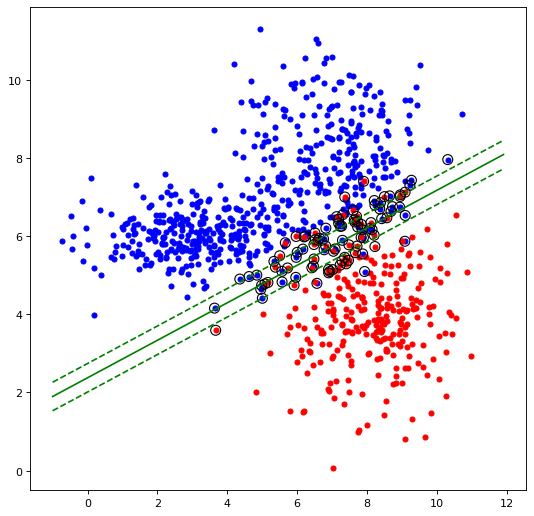

In [6]:
X1, y1 = datasets.make_gaussian_quantiles(cov=2.0, n_samples=300, n_features=2, n_classes=1)
X1[:,0] = 3. + X1[:,0]
X1[:,1] = 6. + X1[:,1]/2.5
X2, y2 = datasets.make_gaussian_quantiles(cov=1.5, n_samples=300, n_features=2, n_classes=1)
X2[:,0] = 8. + X2[:,0]
X2[:,1] = 4. + X2[:,1]
X3, y3 = datasets.make_gaussian_quantiles(cov=1.5, n_samples=300, n_features=2, n_classes=1)
X3[:,0] = 7. + X3[:,0]
X3[:,1] = 8. + X3[:,1]
X = np.concatenate((X1, X2, X3))
y = np.concatenate((y1, - y2 + 1, y3))
y = 2*y-1
X, y = shuffle(X, y)
Xblue = X[y==-1]
Xred = X[y==1]
mySVC = svm.SVC(kernel='linear', C=1)
mySVC.fit(X,y)

# Compute margin and find support vectors
w = mySVC.coef_[0]
w0 = mySVC.intercept_
M = 1./np.linalg.norm(w)
print("SV per class:", mySVC.n_support_)
print("w_i:", w)
print("w_0:", w0)
print("Margin:", M)
print("w^T x0 + w_0:", np.dot(w,mySVC.support_vectors_[0,:])+w0)
print("w^T x1 + w_0:", np.dot(w,mySVC.support_vectors_[1,:])+w0)
print("w^T x2 + w_0:", np.dot(w,mySVC.support_vectors_[2,:])+w0)

# Plot the separating plane, the margin and the Support Vectors
fig_size=(8, 8)
fig=plt.figure(figsize=fig_size, dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(Xblue[:,0],Xblue[:,1],c='b',s=20)
plt.scatter(Xred[:,0],Xred[:,1],c='r',s=20)
XX = np.arange(-1.,12.,0.1)
YY = -(w[0]*XX+w0)/w[1]
plt.plot(XX,YY,'g')
YY = -(w[0]*XX+w0+M)/w[1]
plt.plot(XX,YY,'g--')
YY = -(w[0]*XX+w0-M)/w[1]
plt.plot(XX,YY,'g--')
plt.scatter(mySVC.support_vectors_[:,0], mySVC.support_vectors_[:,1], s=80, edgecolors='k', facecolors='none');
plt.show()

Nothing new up to now!

Here comes the **NOVELTY!** ;)

# <a id="sec3"></a> 3. One-class SVM

## <a id="sec3-1"></a> 3.1. Getting a first intuition of the new problem

&emsp;&emsp;To be clear from the beginning, what **we saw in class is a TWO-class support vector machine where we identified 2-clusters, 2-groups of data or more. The hyperplane that is constructed determines the margin between the classes; all the data points for the class −1 are on one side, and all the data points for class 1 on the other.** 

&emsp;&emsp;Here we are going to use just one class! 

## Just one class?

# YES!!! 

&emsp;&emsp;First look at our problem situation; we would like to determine whether (new) test data is member of a specific class, determined by our training data, or is not. Why would we want this? Imagine a factory type of setting; heavy machinery under constant surveillance of some advanced system. The task of the controlling system is to determine when something goes wrong; the products are below quality, the machine produces strange vibrations or something like a temperature that rises. It is relatively easy to gather training data of situations that are OK; it is just the normal production situation. But on the other side, collection example data of a faulty system state can be rather expensive, or just impossible. If a faulty system state could be simulated, there is no way to guarantee that all the faulty states are simulated and thus recognized in a traditional two-class problem.

&emsp;&emsp;To cope with this problem, one-class classification problems (and solutions) are introduced. By just providing the normal training data, an algorithm creates a (representational) model of this data. If newly encountered data is too different, according to some measurement, from this model, it is labeled as out-of-class. We will look in the application of Support Vector Machines to this one-class problem.

<div class="alert alert-danger"><a href="#answer1" data-toggle="collapse"><b>Q: Since belonging to one class or not, why not a binary classification problem?(click to expand)</b></a><br>
<div id="answer1" class="collapse">
A: In novelty detection there are no “abnormal” data (i.e. 2nd
class data) in the training dataset for you to train on.
Other names: one-class classification, unary classification, outlier
detection, anomaly detection   
   

</div>
</div>




### <a id="sec3-1-1"></a> 3.1.1. One-Class SVM approach and types

&emsp;&emsp;In "One-class Classification", a model is trained on “normal” training data to learn what are normal data points for a particular application. Hence, after the training, the model knows that what are normal data points and we can  further use it to classify abnormal data points in new dataset or in a test dataset. One-class classification is an example of semi-supervised learning. For one-class classification we will be using SVM(Support-Vector Machines) and there are two different approaches:  
- One-Class SVM approach by Schölkopf.
- One-Class SVM approach by Tax and Duin  
   
We will perform our experiment using both approaches and finally we will compare the results.   

<img src="one_class_novelty.png" width="300px"></img>

## <a id="sec3-2"></a> 3.2. Techniques used in one-class SVM

<div class="alert alert-warning"><b>Please pay attention to the order in which the following 6 concepts are given to you.</b><br>

First we start with the novelty detection using **density estimation** and we see that that actually is not that great. Thanks to **Varnick's principle** we can actually optimize our problem. Then, we define the **Maximum Distance Hyperplane** with the notions HARD MARGIN and SOFT MARGIN, that will be used furtherly in our analysis. To help you visualize, the equivalent of One-class SVM called **Minimum Enclosing Ball** is presented. Then we define something extremely important,the **Adaptive Thresholds**, and here you will see the $\rho$ parameter in all the notebook furtherly. Lastly, we explain how we are going to characterize the fractions of SVs and outliers by **$\nu$** and we will even prove it!

Finally you will see an **example** that, I hope will, catch your interest.

<hr style="border:0.1px solid gray"> </hr>

### <a id="sec3-2-1"></a> 3.2.1. Novelty detection using density estimation  


**Key Idea**:
- Novel data is one that we do not see frequently
- It must lie in low density regions

**Step1 : Estimate density**
- Observation $x_1,....,x_l $
- Density estimate via Parzen windows

**Step 2 : Thresholding the density**
- Sort data according to density and use it for rejection
- Practical implementation: compute $p(x_i)=\frac{1}{l}\sum\limits_{j}k(x_i,x_j)$ for all $i$ and sort according to magnitude
- Pick smallest $p(x_i)$ as novel points

<hr style="border:0.1px solid gray"> </hr>

### <a id="sec3-2-2"></a> 3.2.2. Varnick's Principle  

<div class="alert alert-warning">Never solve a problem which is more general than the one that one is actually interested in.<b></b><br>


**Problems**
- We do not care about estimating the density properly in **regions of high density (waste of capacity)**.
- We only care about the **relative density** for thresholding purposes.
- We want to eliminate a certain **fraction of observations**
and tune our estimator specifically for this fraction.

**Solution**
- Areas of low density can be approximated as the **level set** of an auxiliary function. No need to estimate $p(x)$ directly — use proxy of $p(x)$.
- Specifically: find $f(x)$ such that $x$ is novel if $f(x)\leq c$  where $c$ is some constant, i.e. $f(x)$ describes the amount of novelty.

<hr style="border:0.1px solid gray"> </hr>

###  <a id="sec3-2-3"></a>3.2.3. Maximum Distance Hyperplane  

**Idea :** Find hyperplane, given by $f(x) = <w,x> + b = 0$ that
has maximum distance from origin yet is still closer to
the origin than the observations.

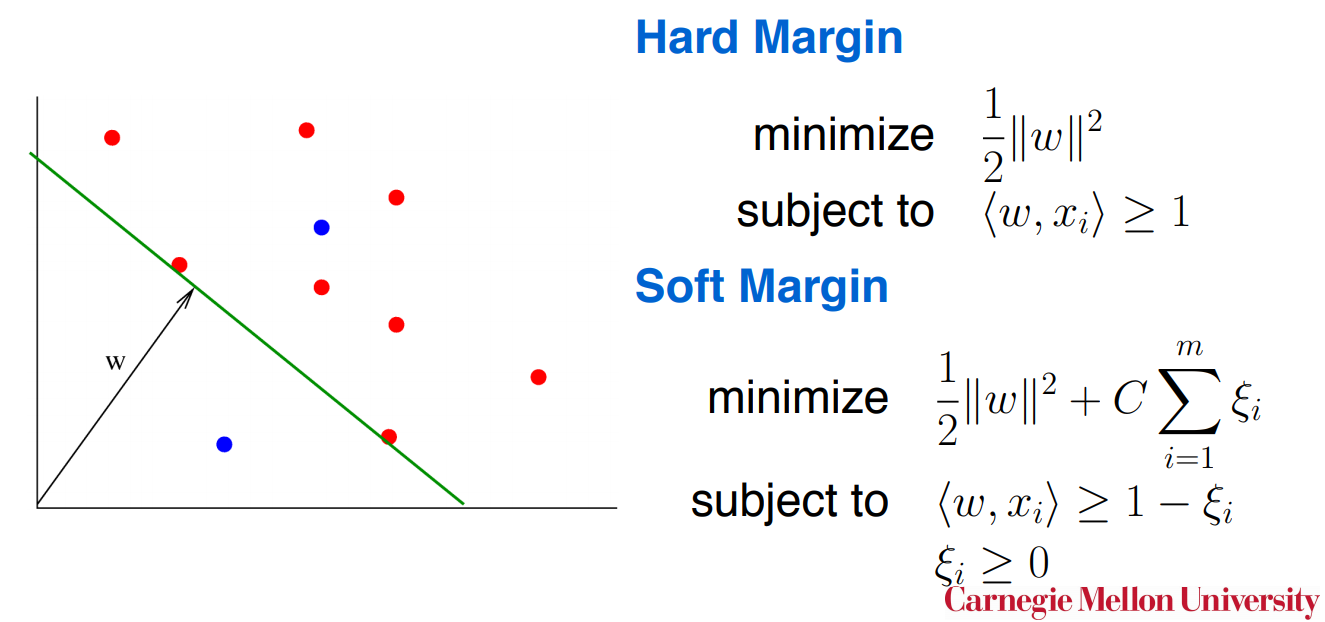

In [10]:
Image(filename='Hyperplane.png') 

We can detect how novel or how common observations are considered  by shifting this hyperplane(in green).
- If I move it towards the origin, more observations are considered typical;
- If I push it further up to the right more observations are considered novel.

### So now onwards we make this offset itself part of the optimization problem. And we will call the offset $\rho$ .###

This is a powerful conceput and YOU CAN USE IT EVEN FOR CLASSIFICATION!

<hr style="border:0.1px solid gray"> </hr>

### <a id="sec3-2-4"></a> 3.2.4. Minimum enclosing ball

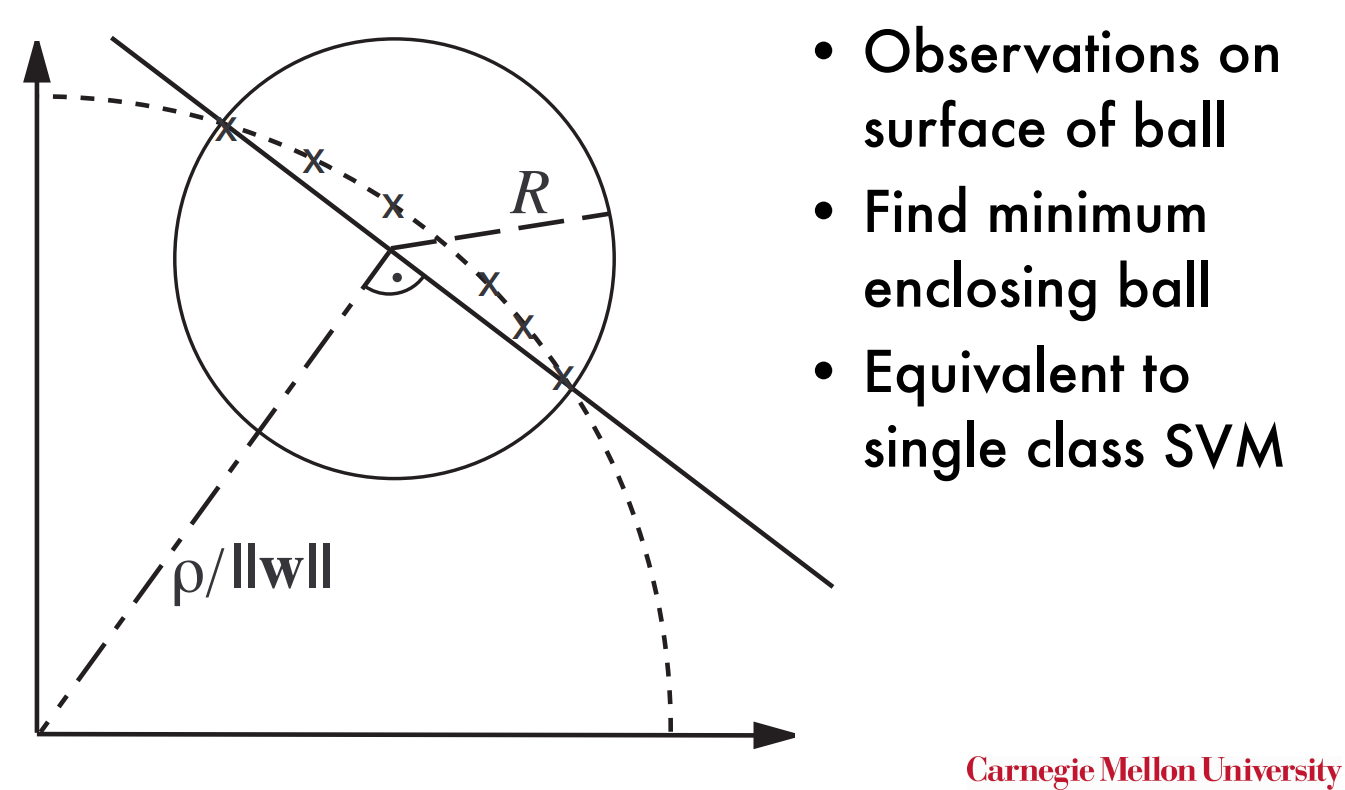

In [15]:
Image(filename='enclosing_ball.png') 

<hr style="border:0.1px solid gray"> </hr>

### <a id="sec3-2-5"></a>3.2.5. Adaptive thresholds

**Problem**
Depending on C(soft margin problem), the number of novel points will vary.
We would like to specify the fraction $\nu$ beforehand.

**Solution**
The way we do this is by saying that we want to find the hyperplane  $$H = \lbrace x|<w,x> =\rho \rbrace  \star$$ 
where the threshold $\rho$ is adaptive. 





<div class="alert alert-warning">$\star$Instead of setting it to 1, we set it to $\rho$! <b></b><br>


**Intuition**
- Let the hyperplane shift by shifting $\rho$ 
- Adjust it such that the ’right’ number of observations is considered novel.
- Do this automatically
- We make $\rho$ itself a variable of the optimisation problem to be adjusted in such a way that it gets adjusted right.

So if:

$\bullet$ we make $\rho$ larger, it will consider more observations as novel

$\bullet$ we make $\rho$  smaller, it will consider more of them as typical

Of course, we would like to have a large $\rho$ ! Because large $\rho$  means hyperplanes far on the right.
So if we have a small $\rho$ , we will have to pay a penalty that we will see below.

<hr style="border:0.1px solid gray"> </hr>

### <a id="sec3-2-6"></a> 3.2.6. The $\nu$-property theorem

Optimization problem
- minimize $\frac{1}{2} \|w\|^2 + \frac{1}{\nu l}\sum\limits_{i}\xi_i - \rho$ 
- subject to $(w.\Phi(x_i)) \ge \rho - \xi_i$,    $\xi_i \ge 0$

Solution satisfies:
- At most a fraction of $\nu$ points are novel
- At most a fraction of $(1 - \nu)$ points aren’t novel
- Fraction of points on boundary vanishes for large l (for non-pathological kernels)

<div class="alert alert-danger"> 

**Proof of The $\nu$-property theorem**

We have 3 sets of points:
   - $l_-$: not novel
   - $l_+$: novel
   - $l_0$: on the boundary  ; with : $l_- +l_+ + l_0 = l$.
Consider $\delta$ the amount that we are shifting.

If we move the hyperplane a little bit to the right, the 2 points that sits exactly on the boundary will all of a sudden become properly novel points. Thus we are paying a penalty  $(l_- + l_0)\delta$  but we will also gain  $l \nu \delta$ (because now the overall margin is larger):
$$(l_- + l_0)\delta + l \nu \delta$$
If we move the hyperplane a little bit to the left: $$ -l_- \delta + l \nu \delta$$

Move boundary at optimality
   - For smaller threshold l- points on wrong side of margin contribute $\delta(l_- - \nu l) \leq 0$
   - For larger threshold l+ points not on ‘good’ side of margin yield $\delta(l_+ - \nu l) \ge 0$
   - Combining inequalities $\frac{l_-}{l} \leq \nu \leq \frac{l_+}{l}$
the fraction of novel points is upper-bounded by $\nu$ which is a lower bound of the fraction of typical points.

Margin set of measure 0

</div>


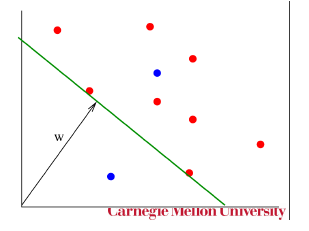

In [13]:
Image(filename='proof_of_nu_theorm.PNG')

The same argument also works for Classification!
For classification we can also play with the width of the margin, so we can make the margin narrower or wider. 
If we make the margin very narrow then it is easier to solve this problem, but then there is not that much of a penalty. 

<hr style="border:0.1px solid gray"> </hr>

### <a id="sec3-2-7"></a> 3.2.7. Example

Next, let us take a look at an experiment on the USPS dataset of handwritten digits found in the research paper "**Support Vector Method for Novelty Detection" by Bernhard Scholkopf, Robert Williamson, Alex Smola, John Shawe-Taylort, John Platt**. 

The database contains 9298 digit images of size 16 x 16 = 256; the last 2007 constitute the test set. The algorithm was 
trained, using a Gaussian kernel of width c = 0.5 . 256 (a common value for SVM classifiers on that data set, cf. B. SchOlkopf, C. Burges, and V. Vapnik. "Extracting support data for a given task". In
U. M. Fayyad and R. Uthurusamy, editors, Proceedings, First International Conference
on Knowledge Discovery & Data Mining. AAAI Press, Menlo Park, CA, 1995.), on the test set and used it to identify outliers
- it is folklore in the community that the USPS test set contains a number of patterns
which are hard or impossible to classify, due to segmentation errors or mislabelling. In the
experiment, the input patterns were augmented by ten extra dimensions corresponding to the
class labels of the digits. The rationale for this is that if the labels were disregarded, there
would be no hope to identify mislabelled patterns as outliers.The image below shows the 20 worst
outliers for the USPS test set. Note that the algorithm indeed extracts patterns which are
very hard to assign to their respective classes. In the experiment, which took 36 seconds on
a Pentium II running at 450 MHz, they used a 11 value of 5%.

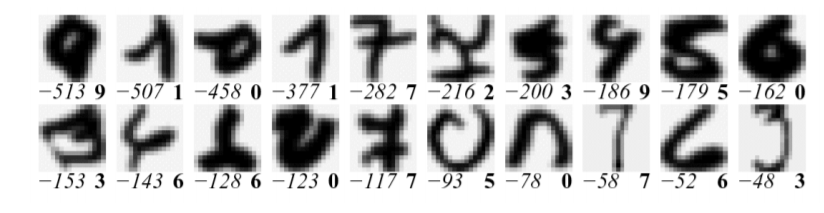

In [14]:
Image(filename='novelty_detection_for_ocr.png')

Novely detection is not quite that well defined in terms of whether there is a clear objective function.
The only thing you can say is that these regions have low density relative to what we consider a well-behaved function.

So you might ask **what is the entire point of this?**

The following example should show you that the digits are a lot uglier. What you see from left to right are the scores: very negative means very novel, and the number to the right of that is what the digits should actually have been.
So you can see that this is basically wrong segmentation happening. In the first line, the last number is a 0 but it could have very well been a 6.
This shows that there is a lot uglier data in the dataset. 

**By being clever about optimizing for low density regions** as opposed to just using a density estimator
then thresholding you get something very meaningful !

<div class="alert alert-success"><b> Points to remember:



- Better estimates since we only optimize in low density regions.
- Specifically tuned for small number of outliers. Only estimates of a level-set.
- For $\nu= 1$ we get the Parzen-windows estimator back( and this is what we would expect because Parzen-windows effectively considers all the observations as "novel" and then sorts accordingly)
    </b><br>
</div>    

Ok, so now it is time for us to practice together step by step!

# <a id="sec4"></a>4. One-class SVM  approach by Schölkopf

&emsp;&emsp;Schölkopf et al. had suggested a method of adapting the **SVM methodology to the one-class classification problem**. Essentially, after transforming the feature via a kernel, they treat the origin as the only member of the second class. Then they separate the data points of the one class from the origin using soft margin. Then the standard two-class SVM techniques are employed.
      
**They framed the problem in the following way:**  
    
&emsp;&emsp;Suppose that a dataset has a probability distribution P in the feature space. Find a
“simple” subset S of the feature space such that the probability of a test point from P
lying outside S is bounded by some a priori specified value.
Suppose that there is a dataset drawn from an underlying probability distribution P.
One needs to estimate a “simple” subset S of the input space such that the probability of a test point from P
lying outside S is bounded by some a priori specified value $\nu$ ∈ (0, 1). The
solution for this problem is obtained by estimating a function $f$ which is positive on S and
negative on the complement S. In other words, Schölkopf et al., developed an algorithm
which returns a function $f$ that takes the value $+1$ in a “small” region capturing most of
the data points, and $-1$ elsewhere.
The algorithm can be summarized as mapping the data points into a feature space H using
an appropriate kernel function, and then trying to separate the mapped data points from the
origin with maximum margin (see Figure 1).

$$
f(x) = \left\{
    \begin{array}\\
        +1 & \mbox{if } \ x \in \mathbf{S} \\
        -1 & \mbox{if } \ x \not\in\mathbf{S}\\
    \end{array}
\right.
$$

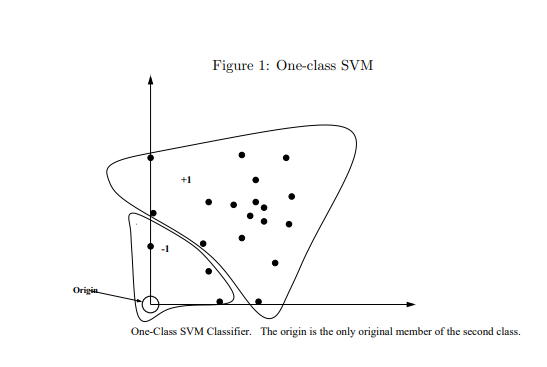

In [16]:
Image(filename='SVM.PNG') 

## <a id="sec4-1"></a> 4.1. Optimization Problem

&emsp;&emsp;In our context, let $x_1, x_2,...,x_l$ be training examples belonging to one class $X$, where
$X$ is a compact subset of $R^N$ . Let $Φ : X \longrightarrow H$ be a kernel map which transforms the
training examples to another space. Then, to separate the data set from the origin, one
needs to solve the following quadratic programming problem:    
    
**Primal problem:**$$min \frac{1}{2}\|w\|^2 + \frac{1}{\nu l}\sum\limits_{i=1}^l \xi_i - \rho  $$

subject to: 
$$(w.Φ(x_i))≥ \rho −\xi_i$$  
   
$$\xi_i≥0$$
for all $i=1,2,…,l$.    

&emsp;&emsp;Here, $\nu \in(0,1)$ is a parameter whose meaning will become clear later. You however got an initial feeling about it in the Adaptive Thresholds section. Since non-zero slack variables $\xi_i$ are penalized in the objective function, we can expect that if $w$ and $\rho$ solve this problem then the decision function
$$f(x) = sgn((w.Φ(x)) - \rho )$$  
will be positive for most examples $x_i$ contained in the training set, while regularization term $||w||$ will still be small. The actual trade-off between normal data points region and abnormal data points region is controlled by $\nu$. $\nu$ is the fraction of data points that are to be considered novel and $\nu \in (0,1)$. 
    

  
**Dual problem:** $$\min\limits_{\alpha} \frac{1}{2} \sum\limits_{ij}\alpha_i \alpha_j k(x_i,x_j)$$
subject to: $$0 \le \alpha_i \le \frac {1}{\nu l}$$   
       
$$\sum\limits_{i} \alpha_i = 1 $$
For dual problem of one-class SVM, the decision function can be shown to have an SV expansion 
  
$$f(x) = sgn(\sum\limits_{i}\alpha_ik(x_i,x)-\rho)$$  
- all the points which are under the hyperplane have an $\alpha_i = \frac {1}{\nu l}$
- all the points which are over the hyperplane have an $\alpha_i = 0$
- all the points who are on the margin have $\alpha_i \in [0, \frac {1}{\nu l}]$   
   
&emsp;&emsp;This problem can be solved with standard QP (Quadratic programming) routines. It does, however, possess features
that sets it apart from generic QPs, most notably the simplicity of the constraints. This can
be exploited by applying a variant of SMO (Sequential minimal optimization) developed for this purpose.

&emsp;&emsp;The offset $\rho$ can be recovered by exploiting that for any $\alpha_i$ which is not at the upper or
lower bound, the corresponding pattern $x_i$ satisfies 
$$\rho = (w . \Phi(x_i)) =\sum\limits_{j}\alpha_j k(x_j, x_i)$$ .  
  
**$\nu$ value trade-off:**  
&emsp;&emsp; We know that $\nu$ is the fraction of data points that are to be considered novel. 
- Note that if **$\nu$ approaches 0**, the upper boundaries on the Lagrange multipliers tend to infinity,
i.e. the second inequality constraint in the dual problem becomes void. The problem then resembles
the corresponding **hard margin algorithm**, since the penalization of errors( $\frac {\rho}{\nu l}$) becomes infinite,
as can be seen from the primal objective function. It can be shown that if the data set
is separable from the origin, then this algorithm will find the unique supporting hyperplane
with the properties that it separates all data from the origin, and its distance to the origin is
maximal among all such hyperplanes.


- If, on the other hand, **$\nu$ approaches 1**, then the constraints alone only allow one solution, that where all $\alpha_i$ are at the upper bound $\frac{1}{\nu l}$. In this case, for kernels with integral 1, such as normalized versions of $k(x,y) = \exp (-\frac{\|x - y\|^2}{c})$, the decision 
function corresponds to a thresholded Parzen windows estimator.




<div class="alert alert-success"> 

$l$ is the number of training examples. $\nu$ is a hyper-parameter (often chosen by human).
- $\nu$ is an upper bound on the fraction of outliers
- $\nu$ is a lower bound on the number of training examples used as Support Vector
    
Also known as $\nu$-SVM.
    <b></b><br>

## <a id="sec4-2"></a> 4.2. Experiment

&emsp;&emsp;For doing an experiment with One-class SVM approach by Schölkopf, we have selected Credit Card fraud detection problem. And we have downloaded the Credit Card fraud detection dataset from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud. We will use **Sklearn oneClassSVM** for the experiment which is basically the Sklearn implementation of Schölkopf's One-class SVM.

**Context:**  
&emsp;&emsp;It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.  
   
**Dataset Content:**   
&emsp;&emsp;The datasets contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

&emsp;&emsp;It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, they had not provided the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. This feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  
    
Class label = 0 [means normal datapoint]  
Class label = 1 [means abnormal datapoint]

We will train our one-class SVM model with normal data points and will detect novalities in unseen dataset.

**Importing required Python libraries**

Please go to the command prompt and **pip install cvxopt**

In [47]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, f1_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

**Loading credit card data in 'data' DataFrame**

In [19]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In total, there are 284807 rows and 31 columns in the dataset.

**General information about dataset**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no Null values in the dataset and all features are numerical features

**Statistical information about the dataset**

In [21]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Above we can see that all features have different - different scales of values so we need to standardize them. Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector, the optimal hyperplane is influenced by the scale of the input features and, therefore, it is recommended to standardize the data (mean 0, var 1) prior to SVM model training.

**Checking class imbalancy**

Value Counts in Class
0    284315
1       492
Name: Class, dtype: int64


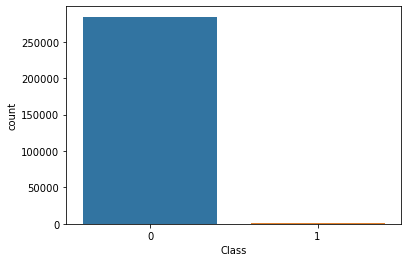

In [22]:
print('Value Counts in Class')
print(data.Class.value_counts())
sns.countplot(data.Class)
plt.show()

The dataset is highly unbalanced.

**Data pre-processing**

In [23]:
# non-fraud transaction dataset
data_class_0 = data[data.Class==0].reset_index(drop=True)
# fraud transaction dataset
data_class_1 = data[data.Class==1].reset_index(drop=True)

In [24]:
data_class_0.shape

(284315, 31)

In [25]:
data_class_1.shape

(492, 31)

There are in total 284315 records for non-fraud transactions but we will select 5000 records randomly to avoid high computational or training time.

In [26]:
# selecting 5000 non-fraud records randomly
random_index = []
for i in range(5000):
    random_index.append(random.randint(0,len(data_class_0)-1))
data_class_0 = data_class_0.iloc[random_index]

In [27]:
data_class_0.shape

(5000, 31)

Now we have our sample dataset to perform the experiment.
Ready?

In [28]:
# concatenating 5000 non-fraud records with all 492 fraud records
sample_data = pd.concat((data_class_0,data_class_1),axis=0).reset_index(drop=True)
sample_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82223.0,-0.544644,-0.063518,1.667452,-0.174139,-0.164606,0.577211,-0.440059,0.187764,-0.656872,...,-0.220053,-0.042568,-0.306751,-1.039065,-0.238202,-0.255197,0.140459,0.127384,34.00,0
1,69802.0,-2.393571,1.762683,0.390332,-0.023598,0.551446,1.450570,-1.031130,-3.300526,-0.314740,...,-0.847327,-0.285156,0.266287,-1.372237,-0.300686,0.164054,-1.135510,-0.878679,2.69,0
2,19053.0,1.171382,-0.347695,1.137520,-0.576601,-1.226718,-0.576245,-0.779359,0.042420,2.897958,...,-0.096242,0.136300,-0.015480,0.487090,0.400960,-0.754939,0.058442,0.021713,11.85,0
3,36975.0,0.773241,-0.226247,0.650817,2.841368,-0.362851,0.379252,0.084270,0.094227,-0.186576,...,0.051830,-0.034352,-0.203550,0.084924,0.480629,0.089816,-0.009618,0.047058,180.72,0
4,166283.0,2.074657,-0.011700,-1.114099,0.375814,-0.022227,-1.116771,0.217769,-0.356578,0.468545,...,-0.293138,-0.680836,0.316094,-0.095370,-0.259810,0.203329,-0.067183,-0.060393,0.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
5488,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
5489,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
5490,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


**For a better performace of our one-class SVM model let's standardize our sample dataset**

In [29]:
# separating target feature from sample dataset
x = sample_data.drop('Class',axis = 1) 
y = sample_data.Class

In [30]:
# applying Sklearn's StandardScaler() function for standardization
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

**Lets visualize our sample dataset**  
We will apply the TSNE dimensionality reduction to reduce the dimension of our dataset from 30 dimensions to 2 dimensions for a better visualization.

In [31]:
tsne = TSNE(n_components=2, n_jobs=-1, verbose=10, random_state=0,n_iter=500)
x_reduced = tsne.fit_transform(x_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5492 samples in 0.051s...
[t-SNE] Computed neighbors for 5492 samples in 0.639s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5492
[t-SNE] Computed conditional probabilities for sample 2000 / 5492
[t-SNE] Computed conditional probabilities for sample 3000 / 5492
[t-SNE] Computed conditional probabilities for sample 4000 / 5492
[t-SNE] Computed conditional probabilities for sample 5000 / 5492
[t-SNE] Computed conditional probabilities for sample 5492 / 5492
[t-SNE] Mean sigma: 1.111169
[t-SNE] Computed conditional probabilities in 0.189s
[t-SNE] Iteration 50: error = 88.5134506, gradient norm = 0.0144079 (50 iterations in 1.568s)
[t-SNE] Iteration 100: error = 85.9088440, gradient norm = 0.0015523 (50 iterations in 1.465s)
[t-SNE] Iteration 150: error = 85.6532440, gradient norm = 0.0009420 (50 iterations in 1.479s)
[t-SNE] Iteration 200: error = 85.6170807, gradient norm = 0.0003141 (50 iterations in 1.542s)
[t

**Reduced Dataset**

In [32]:
reduced_data = pd.DataFrame(x_reduced)
reduced_data.columns = ['Dim1','Dim2']
reduced_data['Class'] = y
reduced_data

,Dim1,Dim2,Class
0,-1.277997,-19.062031,0
1,1.215646,1.922584,0
2,16.388315,-24.855703,0
3,23.867275,9.760909,0
4,-41.547321,-13.145008,0
...,...,...,...
5487,9.484593,41.102665,1
5488,4.192116,40.187813,1
5489,4.081670,39.849026,1
5490,9.583328,41.011208,1


**Visualization of our reduced dataset**

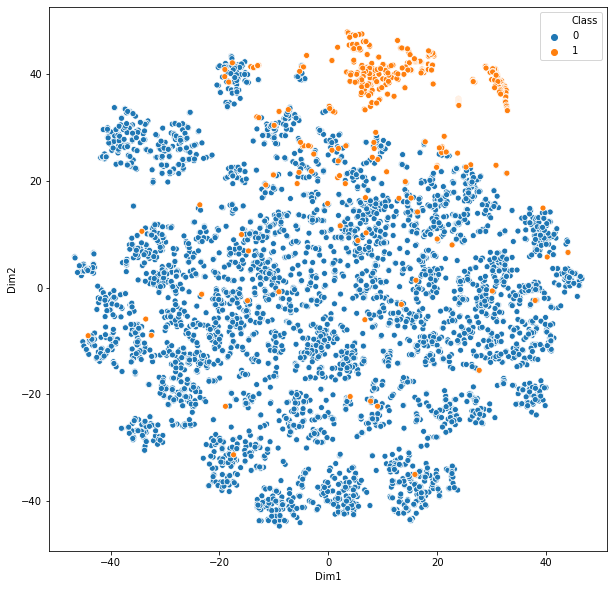

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Dim1',y='Dim2',hue='Class',data=reduced_data)
plt.show()

Above we can see that there is a well seperated cluster of **Fraud cases data points (Orange color)**. However, some of **Fraud cases data points are overlapping with non-fraud cases data points (blue color)**.

**Preparing training and testing the dataset**

In [34]:
# train test split
# selection of 4000 non fraud records for training our one-class SVM
train = reduced_data[reduced_data.Class==0][0:4000] 
# rest of the records for testing and validation purpose
test = pd.concat((reduced_data[reduced_data.Class==0][4000:], reduced_data[reduced_data.Class==1]),axis=0)
# dropping class labels from train dataset
train = train.drop('Class',axis=1)

# test set
x_test = test.drop('Class',axis=1)
y_test = test.Class

In [35]:
y_test

4000    0
4001    0
4002    0
4003    0
4004    0
       ..
5487    1
5488    1
5489    1
5490    1
5491    1
Name: Class, Length: 1492, dtype: int64

### Model Training

In [36]:
h = .02 # step size
x_min, x_max = x_test.values[:, 0].min() - .5, x_test.values[:, 0].max() + .5
y_min, y_max = x_test.values[:, 1].min() - .5, x_test.values[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [37]:
nu_list = [0.1,0.5,0.8] 

Run the code below and be patient! It will take some time. Or just take a look at it like this!

<div class="alert alert-warning"><b>Recommandation:</b><br>
   If you are in Jupyter Notebook, do not run the code! Due to its structure, it takes time!

[LibSVM][LibSVM][LibSVM]

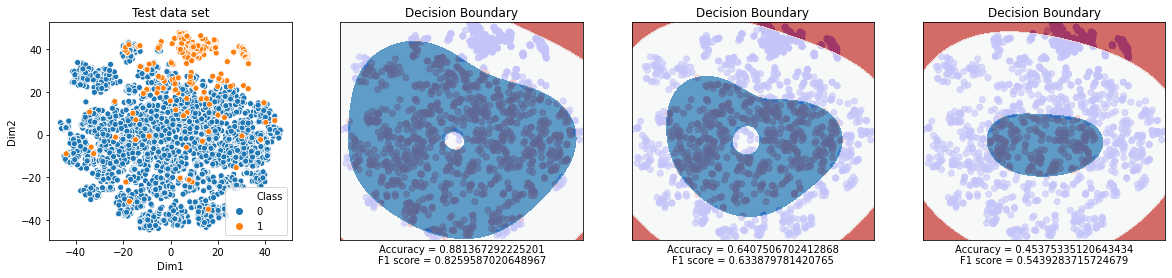

In [38]:
plt.figure(figsize=(20,4))
plt.subplot(1, 4, 1)
sns.scatterplot(x='Dim1',y='Dim2',hue='Class',data=reduced_data)
plt.title('Test data set')

plot_count = 1
for nu in nu_list:
    ocsvm = OneClassSVM(kernel='rbf',gamma='scale',nu=nu,verbose=True)
    ocsvm.fit(train)
    y_predicted = ocsvm.predict(x_test)
    #As SVM predicts values either 1 or -1 so we need to convert it into 0 or 1 
    #to compare predicted class labels with actual class labels.
    y_predicted[y_predicted==1]=0
    y_predicted[y_predicted==-1]=1 
    accuracy = accuracy_score(y_test,y_predicted)
    f_score = f1_score(y_test,y_predicted)
    
    Z = ocsvm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    plot_count +=1
    plt.subplot(1, 4, plot_count)
    plt.scatter(x_test.values[:, 0], x_test.values[:, 1], c=y_predicted, cmap=cm_bright, alpha=0.6)
    plt.title('Decision Boundary')
    plt.xlabel('Accuracy = '+str(accuracy)+'\n'+'F1 score = '+str(f_score))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z,levels = 1,cmap=cm, alpha=.8)
    
plt.show()

##  <a id="sec4-3"></a>4.3. Results

Single-class SVM applied to credit card fraud detection problem. 

<div class="alert alert-warning">Note how the decision boundary is changing when the value of $\nu$ changes. As the value of $\nu$ increases, the fraction of data points that are to be considered novel also increases and this can be seen in the form of boundary shrinking. Looking at the accuracies and scores, $\nu$ = 0.1(Accuracy = 88%) seems to give better results than the other 2($\nu=0.5$ and $\nu = 0.8$ ).  <b></b><br> 

Feel free to test the experiment for different $\nu$ values in the nu_list above. 

# <a id="sec5"></a>5. One-Class SVM approach by Tax and Duin

&emsp;&emsp;The method proposed by Tax and Duin for One-Class SVM is called SVDD (Support Vector Data Description) and provides the geometrical description of the training data. SVDD takes a spherical approach, instead of a planar one. In the feature space, the algorithm provides a spherical boundary around the data.   

## <a id="sec5-1"></a> 5.1. Flexible Data Description

&emsp;&emsp;The method proposed by Tax and Duin for One-Class SVM is called SVDD (Support Vector Data Description) and provides the geometrical description of the training data. SVDD takes a spherical approach, instead of a planar one. In the feature space, the algorithm provides a spherical boundary around the data.   
    
&emsp;&emsp;The simplest form of SVDD is **Normal data description**, considering a star shape structure dataset-  

<img src = 'NDD.png' width="300px"></img>

&emsp;&emsp;The boundary (blue dotted) of the dataset can be used to detect novel data or outliers. The points lying outside the boundary are abnormal and the points lying inside the boundary are inlier. But, inside the boundary not all the points are normal which means that they are incorrectly labeled. In order to overcome this problem, Tax and Duin introduced **Flexible Data Description** in which the volume of this hypersphere (boundary) is minimized, to minimize the effects of incorporating outliers/novelities in the solution.   

&emsp;&emsp;The resulting hypersphere is characterized by a center $a$ and a radius $R > 0$ as distance from the center to (any support vector on) the boundary, of which the volume $R^2$ will be minimized. The center $a$ is a linear combination of the support vectors (that are the training data points for which the Lagrange multiplier is non-zero). Just as the traditional formulation, it could be required that all the distances from data points $x_i$ to the center is strict less than $R$, but to create a soft margin we will be using again slack variables $ξ_i$ with penalty parameter $C$ . The minimization problem then becomes:

$$\min\limits_{R,a}R^2 + C\sum\limits_{i=1}^nξ_i$$   
   
$$subject\space to:$$   
   
$$||x_i-a||^2 \le R^2 + ξ_i\space\space for\space all\space i = 1,2,.....,n$$
$$\qquad\qquad ξ_i\ge0 \qquad for\space all \space i = 1,2,.....,n$$

<div class="alert alert-danger"><a><b>How many constraints here for each i? </b></a><br>
Reduce to only one constraint per i — finding the most violating constraint: a Maximum-A-Posteriori (MAP) inference problem.   
   
</div>
</div>

After solving this by introducing Lagrange multipliers $α_i$, a new data point $z$ can be tested to be in or out of class. A new data point is considered in-class when the distance to the center is smaller than or equal to the radius, by using the Gaussian kernel as a distance function over two data points:

$$||z-X||^2 = \sum\limits_{i=1}^n\alpha_i exp(\frac {-||z-x_i||^2}{\sigma^2})\ge -R^2/2 + C_R$$

Tax and Duin assumed that the vectors $X$ are column vectors and $X^2 = X · X$.
We have a training set {$x_i$}$,i = 1,..., N$ for which we want to obtain a description. 
They further assumed that the data shows variances in all feature directions.

#### Result with Flexible Data Description

<img src = 'FDD.png' width="300px"></img>

<div class="alert alert-warning"><b>Note:</b><br>

Now, we can clearly see that the boundary is closely following the geometrical structure of the dataset. The points in the red region are considered outliers/novelties and the points in the blue region are considered normal points.

<img src = 'R^2.png' width="1000px"></img>

## <a id="sec5-2"></a>5.2. Experiment

For our experiment we will use SVDD implemented in this Github (https://github.com/iqiukp/SVDD) repository.

**Dataset**   
We will perform our experiment with the same dataset [Credit Card fraud Detection] that we used in Schölkopf's one-class SVM. Since we have already pre-processed our dataset, we will directly apply one-class SVM by Tax and Duin to detect fraud cases data points on test dataset. 

In [40]:
# dataset to train SVDD model
x_train = train
x_train

,Dim1,Dim2
0,-1.277997,-19.062031
1,1.215646,1.922584
2,16.388315,-24.855703
3,23.867275,9.760909
4,-41.547321,-13.145008
...,...,...
3995,-13.584491,6.030481
3996,-31.373186,-29.335785
3997,43.499962,3.494833
3998,-7.175223,33.167633


In [41]:
# train data points labels
y_train = reduced_data.Class[0:4000]
y_train.value_counts()

0    4000
Name: Class, dtype: int64

In [42]:
# changing positive class label according to SVM (1 represents positive class SVM)
y_train[y_train==0]=1
# converting y_train into column vector
y_train = y_train.values.reshape(len(y_train),1)

In [43]:
# dataset to test SVDD model
x_test

,Dim1,Dim2
4000,15.773871,11.633829
4001,-30.376406,-17.330605
4002,26.622473,-11.864274
4003,-5.477563,-20.470816
4004,-9.559991,20.931637
...,...,...
5487,9.484593,41.102665
5488,4.192116,40.187813
5489,4.081670,39.849026
5490,9.583328,41.011208


In [44]:
# test data points lables
y_test

4000    0
4001    0
4002    0
4003    0
4004    0
       ..
5487    1
5488    1
5489    1
5490    1
5491    1
Name: Class, Length: 1492, dtype: int64

In [45]:
# changing positive class label according to SVM (1 represents positive class SVM)
y_test[y_test==1]=-1
y_test[y_test==0]=1
# converting y_test into column vector
y_test = y_test.values.reshape(len(y_test),1)

**Importing SVDD model**   
We have already downloaded SVDD code from the GitHub repositry mentionned above.

In [48]:
import sys
sys.path.append("..")
from src.svdd import SVDD

In [49]:
# preparing the grid to plot the decision boundary
data = x_test.values
numGrids = np.rint(data.shape[0]/2).astype(int)
x_range = np.zeros(shape=(numGrids, 2))
for i in range(2):  
    _tmp_ = (np.max(data[:, i])-np.min(data[:, i]))*0.3
    xlim_1 = np.min(data[:, i])-_tmp_
    xlim_2 = np.max(data[:, i])+_tmp_
    x_range[:, i] = np.linspace(xlim_1, xlim_2, numGrids)
xv, yv = np.meshgrid(x_range[:, 0], x_range[:, 1])

In [50]:
# hyper-parameters values lists 
positive_penality = [0.1,0.5]
kernel_width = [0.1,0.5]

**Training SVDD model**

<div class="alert alert-warning"><b>Recommandation:</b><br>
   If you are in Jupyter Notebook, do not run the code! Due to its structure, it takes time!

In [51]:
# training SVM model for values in hyper-parameter list
# list to store the distance of points from the centers of the data description boundary for all values in the hyper-parameter list
distance_list = [] 
for penality in positive_penality:
    for width in kernel_width:
        # setting SVDD parameters
        parameters = {"positive penalty": penality,
                      "negative penalty": 0.1,
                      "kernel": {"type": 'gauss', "width": width},
                      "option": {"display": 'off'}}
        # constructing an SVDD model
        svdd = SVDD(parameters)
        # training our SVDD model with positive class points only
        svdd.train(train.values,y_train)
        num1 = xv.shape[0]
        num2 = yv.shape[0]
        distance = np.zeros(shape=(num1, num1))
        display_ = svdd.parameters["option"]["display"]
        svdd.parameters["option"]["display"] = 'off'       
        for i in tqdm(range(num1)):
            for j in range(num2):
                tmp = np.mat([xv[i, j], yv[i, j]])   
                distance[i, j], _ = svdd.test(tmp, 1) 
        distance_list.append(distance)

100%|████████████████████████████████████████████████████████████████████████████████| 746/746 [07:24<00:00,  1.68it/s]


**Finding accuracies**

In [52]:
accuracy = []
for penality in positive_penality:
    for width in tqdm(kernel_width):
        parameters = {"positive penalty": penality,
                      "negative penalty": 0.1,
                      "kernel": {"type": 'gauss', "width": width},
                      "option": {"display": 'off'}}
        svdd = SVDD(parameters)
        svdd.train(train.values,y_train)
        _,acc = svdd.test(x_test.values,y_test)
        accuracy.append(acc)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:28<00:00, 74.37s/it]


**Plotting results**

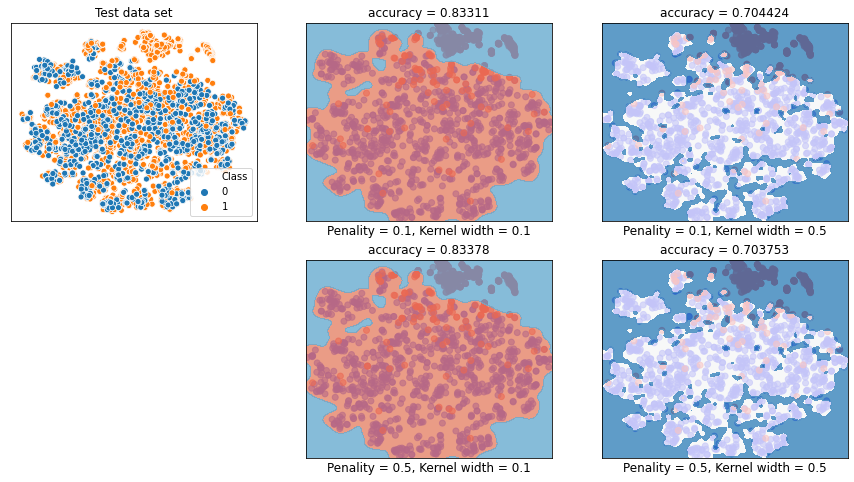

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(2, 3, 1)
sns.scatterplot(x='Dim1',y='Dim2',hue='Class',data=reduced_data)
plt.xlabel('')
plt.ylabel('')
plt.xticks(())  
plt.yticks(())
plt.title('Test data set', fontsize=12)

accuracy = np.round(accuracy,6)
plt.subplot(2, 3, 2)
svdd.parameters["option"]["display"] = display_
plt.scatter(x_test.values[:, 0], x_test.values[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
plt.title('accuracy = '+str(accuracy[0]), fontsize=12)
plt.xlabel('Penality = 0.1, Kernel width = 0.1', fontsize=12)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())  
plt.yticks(())
plt.contourf(xv, yv, distance_list[0],levels = 1,cmap=cm, alpha=.8)

plt.subplot(2, 3, 3)
svdd.parameters["option"]["display"] = display_
plt.scatter(x_test.values[:, 0], x_test.values[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
plt.title('accuracy = '+str(accuracy[1]), fontsize=12)
plt.xlabel('Penality = 0.1, Kernel width = 0.5', fontsize=12)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())  
plt.yticks(())
plt.contourf(xv, yv, distance_list[1],levels = 1,cmap=cm, alpha=.8)

plt.subplot(2, 3, 5)
svdd.parameters["option"]["display"] = display_
plt.scatter(x_test.values[:, 0], x_test.values[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
plt.title('accuracy = '+str(accuracy[2]), fontsize=12)
plt.xlabel('Penality = 0.5, Kernel width = 0.1', fontsize=12)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())  
plt.yticks(())
plt.contourf(xv, yv, distance_list[2],levels = 1,cmap=cm, alpha=.8)

plt.subplot(2, 3, 6)
svdd.parameters["option"]["display"] = display_
plt.scatter(x_test.values[:, 0], x_test.values[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
plt.title('accuracy = '+str(accuracy[3]), fontsize=12)
plt.xlabel('Penality = 0.5, Kernel width = 0.5', fontsize=12)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())  
plt.yticks(())
plt.contourf(xv, yv, distance_list[3],levels = 1,cmap=cm, alpha=.8)

plt.show()

## <a id="sec5-3"></a>5.3. Results

<div class="alert alert-warning"><b>Note:</b><br>
Single-class SVM (SVDD approach) applied to credit card fraud detection problem. 

Note how data description boundary changes as there are changes in hyper-parameters values. Here we have two hyper-parameters: **"Penality"** and **"Kernel Width"**.  We can clearly see that by changing the values of our "Penalty" hyper-parameter there is no significant effect on our results. But, on the contrary, changes in "Kernel Width" seem to impact significantly the data description boundary. Large value of Kernel Width gave us a better novelity detector.

# <a id="sec6"></a>6. Comparison between Schölkopf approach and Tax and Duin approach

&emsp;&emsp;We have performed our experiment on Credit Card Fraud Detection dataset using both Schölkopf approach and Tax and Duin approach.  
   
&emsp;&emsp;Tax and Duin approach is better for both overlapping and non-overlapping cases becuase it's try to find the actual geometrical structure of normal data points and able to identify abnormal data points in the region of normal data points and hence we found it better than Schölkopf.

<div class="alert alert-danger"><a><b>When should we use Schölkopf approach ? </b></a><br>

Schölkopf approach is appropriate when there is no overlapping between normal and abnormal data points. Our Credit Card Fraud Detection dataset has overlapping between normal and abnormal data points. When we tried to increase the fraction of data points that are to be considered novel ($\nu$), Schölkopf didn not perform well and labeled many normal data points as abnormal.    
   

</div>
</div>


<div class="alert alert-danger"><a ><b>When should we use Tax and Duin approach ? </b></a><br>

Tax and Duin approach is better for both overlapping and non-overlapping cases because it tries to find the actual geometrical structure of normal data points and is able to identify abnormal data points in the region of normal data points. Hence we find that Tax and Duin was better than Schölkopf in this case with the Credit Card Fraud Detection.
   

</div>
</div>

# <a id="sec7"></a> 7. Conclusion 

One could view the present work as an attempt to provide an algorithm which is in line
with Vapnik's principle never to solve a problem which is more general than the one that
one is actually interested in. E.g., in situations where one is only interested in detecting
novelty, it is not always necessary to estimate a full density model of the data. Indeed,
density estimation is more difficult than what we have done, in several respects.


Mathematically speaking, a density will only exist if the underlying probability measure
possesses an absolutely continuous distribution function. The general problem of estimating
the measure for a large class of sets, say the sets measureable in Borel's sense, is not
solvable (for a discussion, see "V. Vapnik. Statistical Learning Theory. Wiley, New York, 1998."). Therefore we need to restrict ourselves to making
a statement about the measure of some sets.

**Given a small class of sets, the simplest estimator
accomplishing this task is the empirical measure, which simply looks at how many
training points fall into the region of interest. Our algorithm does the opposite. It starts
with the number of training points that are supposed to fall into the region, and then estimates
a region with the desired property.** Often, there will be many such regions - the
solution becomes unique only by applying a regularizer, which in our case enforces that
the region be small in a feature space associated to the kernel. This, of course, implies, that
the measure of smallness in this sense depends on the kernel used, in a way that is no different
to any other method that regularizes in a feature space.

We believe that this approach, proposing a concrete algorithm with well-behaved computational
complexity (convex quadratic programming) for a problem that so far has mainly
been studied from a theoretical point of view has abundant practical applications. To turn
the algorithm into an easy-to-use black-box method for practicioners, questions like the
selection of kernel parameters (such as the width of a Gaussian kernel) have to be tackled.

# <a id="sec8"></a>8. Bibliography

$[1]$ "Support Vector Method for Novelty Detection" Bernhard Scholkopf, Robert Williamson,Alex Smola, John Shawe-Taylort, John Platt

$[2]$ Geoff Gordon and Alex Smola, Carnegie Mellon University

$[3]$ http://rvlasveld.github.io/blog/2013/07/12/introduction-to-one-class-support-vector-machines/

$[4]$ Credit Card fraud detection dataset from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud

$[5]$ SVDD implemented in Github (https://github.com/iqiukp/SVDD) repository.